# Laboratorul 3

Rezolvați exercițiile de mai jos în celulele care v-au fost puse la dispoziție. La final, rulați tot notebook-ul și asigurați-vă că nu aveți erori. Salvați fișierul și încărcați-l în assignment-ul de Teams corespunzător grupei voastre.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice

## Exercițiul 1

Generați un semnal sinusoidal folosind funcția sinus (`np.sin`) cu o amplitudine, frecvență și fază aleasă de voi. Generați apoi un semnal folosind funcția cosinus (`np.cos`) astfel încât, pe orizontul de timp ales, acesta să fie identic cu semnalul sinus. Verificați afișându-le grafic în două subplot-uri diferite.

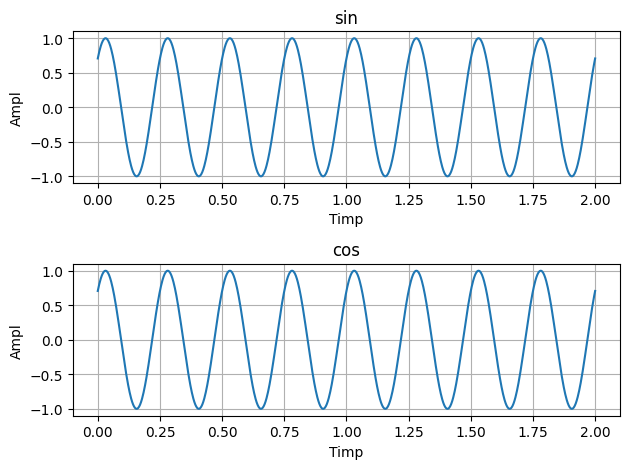

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice

A=1
Fs=4
Faza_sin=np.pi/4
Faza_cos=Faza_sin-np.pi/2
t=np.linspace(0, 2, 1000)
x_sin=A*np.sin(2*np.pi*Fs*t+Faza_sin)
x_cos=A*np.cos(2*np.pi*Fs*t+Faza_cos)

plot, axs=plt.subplots(2, 1)
axs[0].plot(t,x_sin)
axs[0].set_title('sin')
axs[0].set_xlabel('Timp')
axs[0].set_ylabel('Ampl')
axs[0].grid(True)

axs[1].plot(t, x_cos)
axs[1].set_title('cos')
axs[1].set_xlabel('Timp')
axs[1].set_ylabel('Ampl')
axs[1].grid(True)

plt.tight_layout()
plt.show()


## Exercițiul 2

Generați un semnal sinusoidal de amplitudine egală cu 1 și cu o frecvență aleasă de voi. Încercați 4 valori diferite pentru fază. Afișați toate semnalele pe același grafic.

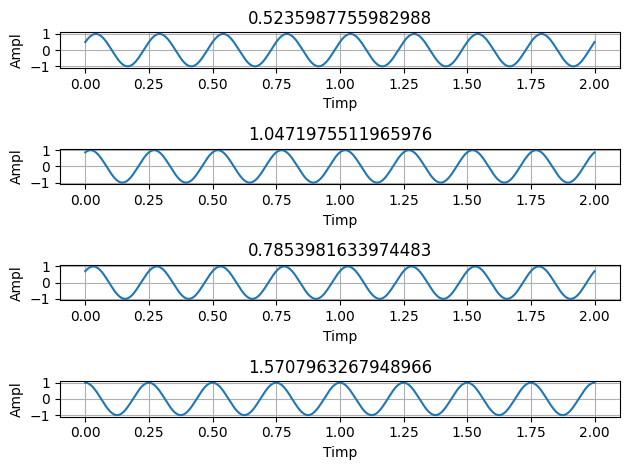

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice

A=1
Fs=4

Faza_sin_1=np.pi/6
Faza_sin_2=np.pi/3
Faza_sin_3=np.pi/4
Faza_sin_4=np.pi/2



t=np.linspace(0, 2, 1000)
x_sin_1=A*np.sin(2*np.pi*Fs*t+Faza_sin_1)
x_sin_2=A*np.sin(2*np.pi*Fs*t+Faza_sin_2)
x_sin_3=A*np.sin(2*np.pi*Fs*t+Faza_sin_3)
x_sin_4=A*np.sin(2*np.pi*Fs*t+Faza_sin_4)


plot, axs=plt.subplots(4, 1)
axs[0].plot(t,x_sin_1)
axs[0].set_title(Faza_sin_1)
axs[0].set_xlabel('Timp')
axs[0].set_ylabel('Ampl')
axs[0].grid(True)

axs[1].plot(t,x_sin_2)
axs[1].set_title(Faza_sin_2)
axs[1].set_xlabel('Timp')
axs[1].set_ylabel('Ampl')
axs[1].grid(True)

axs[2].plot(t,x_sin_3)
axs[2].set_title(Faza_sin_3)
axs[2].set_xlabel('Timp')
axs[2].set_ylabel('Ampl')
axs[2].grid(True)

axs[3].plot(t,x_sin_4)
axs[3].set_title(Faza_sin_4)
axs[3].set_xlabel('Timp')
axs[3].set_ylabel('Ampl')
axs[3].grid(True)

plt.tight_layout()
plt.show()

## Exercițiul 3

Generați două semnale cu forme de undă diferite (ex. unul sinusoidal, celălalt sawtooth) pe același orizont de timp și adunațile eșantioanele. Afișați grafic cele două semnale inițiale și suma lor, fiecare în câte un subplot.

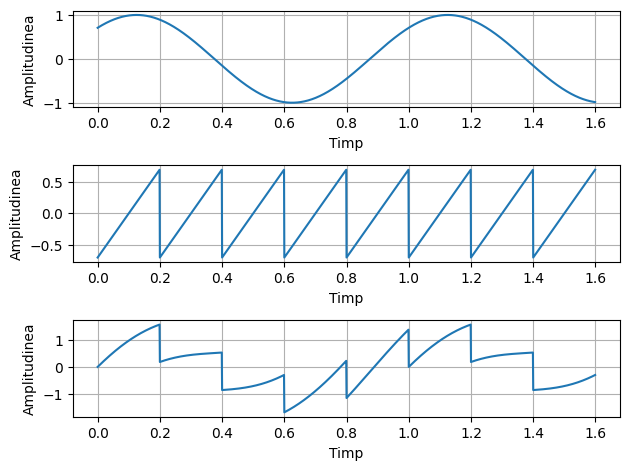

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal
import sounddevice as sd

f_esantionare=1000
durata=2
n=np.arange(1600) # nr esantionae
t=n/f_esantionare
A_sin=1
f_sin=1
faza_sin=np.pi/4
sin_x=A_sin*np.sin(2*np.pi*f_sin*t+faza_sin)

A_saw=0.7
f_saw=5
sawtooth_x=A_saw*signal.sawtooth(2*np.pi*f_saw*t)

suma=sin_x+sawtooth_x

plt.subplot(3, 1, 1)
plt.plot(t, sin_x)
plt.ylabel('Amplitudinea')
plt.xlabel('Timp')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, sawtooth_x)
plt.ylabel('Amplitudinea')
plt.xlabel('Timp')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, suma)
plt.ylabel('Amplitudinea')
plt.xlabel('Timp')
plt.grid(True)

plt.tight_layout()
plt.show()

## Exercițiul 4

Generați două semnale cu aceeași formă de undă, dar de frecvențe diferite, și concatenați-le (puneți-le unul după celălalt în același vector). Redați audio rezultatul și notați ce observați.

**Observație:** Intervalul de frecvențe pe care îl poate percepe urechea umană este aproximativ 40&ndash;20000 Hz. Semnalele voastre ar trebui să aibă frecvențele fundamentale în acest interval dacă vreți să le puteți auzi. Frecvența de eșantionare ar trebui să fie 44100 Hz.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice as sd

f_esantionare=44100
A=0.5
Fs_1=800
Fs_2=1000
Faza_sin_1=np.pi/4
Faza_sin_2=np.pi/2
durata=3
t=np.arange(durata*f_esantionare)/f_esantionare
x_sin_1=A*np.sin(2*np.pi*Fs_1*t+Faza_sin_1)
x_sin_2=A*np.sin(2*np.pi*Fs_2*t+Faza_sin_2)
semnal_concat=np.concatenate((x_sin_1, x_sin_2))

sd.play(semnal_concat, f_esantionare)
sd.wait()

## Exercițiul 5

Generați un semnal sinusoidal de frecvență 200 Hz, eșantionat la o frecvență de 500 Hz pe un interval de timp ales de voi (dar suficient de mic cât să puteți distinge oscilațiile). Decimați-l la 1/4 din frecvența inițială (păstrați doar al 4-lea fiecare element din vector).

1. Afișați grafic semnalul inițial și cel decimat și comentați diferențele.

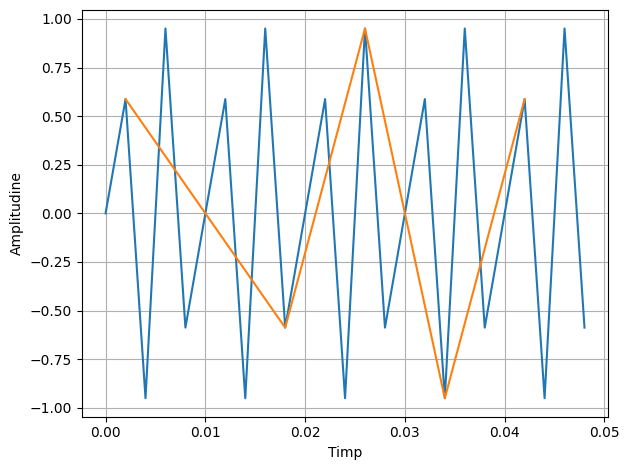

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice as sd

f_semnal=200
f_esantionare=500
durata=0.05

t=np.arange(0, durata, 1/f_esantionare)
sin_x=np.sin(2*np.pi*f_semnal*t)

decimare=4
x_decimat=sin_x[1::decimare]
t_decimat=t[1::decimare]
f_esantionare_decimat=f_esantionare/decimare

plt.plot(t, sin_x)
plt.plot(t_decimat, x_decimat)
plt.xlabel('Timp')
plt.ylabel('Amplitudine')
plt.grid(True)
plt.tight_layout()
plt.show()

#din cauza f_esantionare mici nu avem rezolutie la semnal, f_esantionare ar trebuii sa fie mai mare 
#avem minimiul de informatii in primul semnal, din nyquist f_esantionare>=2*f_semnal
#Primul semnal decimat la 1/4 are F_esantionare=500/4=125 ( aproximativ ) deci 125<2*200 deci apare fenomenul de aliasing

2. Repetați decimarea (tot la 1/4 din frecvența inițială) pornind acum de la al doilea sau de la al treilea element din vector. Ce observați? Este decimarea invariantă în timp?

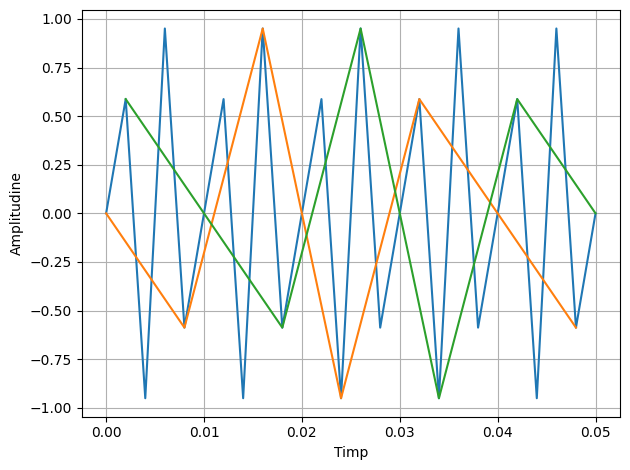

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice as sd

f_semnal=200
f_esantionare=500
durata=0.05
n=int(durata*f_esantionare+1)
t=np.linspace(0, durata, n)
sin_x=np.sin(2*np.pi*f_semnal*t)

decimare=4
x_decimat=sin_x[::decimare]
t_decimat=t[::decimare]
f_esantionare_decimat=f_esantionare/decimare

x_decimat_2=sin_x[1::decimare]
t_decimat_2=t[1::decimare]
f_esantionare_decimat_2=f_esantionare/decimare

plt.plot(t, sin_x)
plt.plot(t_decimat, x_decimat)
plt.plot(t_decimat_2, x_decimat_2)
plt.xlabel('Timp')
plt.ylabel('Amplitudine')
plt.grid(True)
plt.tight_layout()
plt.show()

#semnalul portocaliu si semnalul verde par similare dar defazate, se poate sa fie asa datorita fenomenului de aliasing
#presupun ca programul alege cel mai scurt drum de la un punct la altul
#Din grafic cred ca rezulta ca decimarea nu este invarianta in timp, chiar daca semnalele par identice ca forma ele sunt decalate deci y1(t)!=y2(t)


## Exercițiul 6

În practică se operează des cu următoarea aproximare: pentru valori mici ale lui $\alpha$, $\sin(\alpha) \approx \alpha$. Verificați dacă această aproximare este bună, reprezentând grafic cele două curbe ($f (x) = x$
și $f (x) = \sin(x)$) pentru valori în intervalul $[-\pi/2, \pi/2]$.

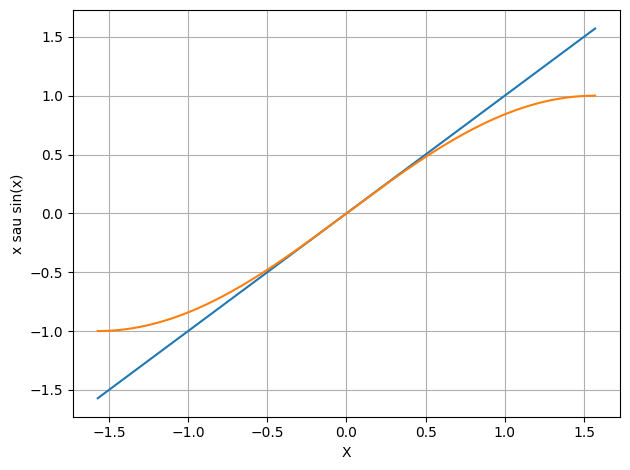

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sounddevice as sd

x=np.arange(-1*np.pi/2,np.pi/2, 0.0005)
y_x=x
y_sin=np.sin(x)

plt.plot(x, y_x)
plt.plot(x, y_sin)
plt.xlabel('X')
plt.ylabel('x sau sin(x)')
plt.grid(True)
plt.tight_layout()
plt.show()

# din ce observ in garfic aproximarea este din ce in mai buna cu cat ne apropiem de mijlocul intervalului si scade cand ne indreptam spre capete
